In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
## Uncomment once per computer
#!pip install pyrolite
#!pip install Thermobar
#!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/0.02.zip"
import Thermobar as pt
import pyrolite

C:\Users\penny\anaconda3\lib\site-packages\numpydoc\docscrape.py:449: UserWarning: potentially wrong underline length... 
Note 
----- in 
Plots spidergrams for trace elements data. Additional arguments are typically forwarded
to respective :mod:`matplotlib` functions :func:`~matplotlib.pyplot.plot` and... in the docstring of spider in C:\Users\penny\anaconda3\lib\site-packages\pyrolite\plot\spider.py.
  warn(msg)
C:\Users\penny\anaconda3\lib\site-packages\numpydoc\docscrape.py:449: UserWarning: potentially wrong underline length... 
Parameters 
----------- in 
Method for plotting histograms (mode='hist2d'|'hexbin') or kernel density
esitimates from point data. Convenience access function to... in the docstring of density in C:\Users\penny\anaconda3\lib\site-packages\pyrolite\plot\__init__.py.
  warn(msg)
C:\Users\penny\anaconda3\lib\site-packages\numpydoc\docscrape.py:449: UserWarning: potentially wrong underline length... 
Note 
----- in 
Creates diagramatic representation of data den

In [3]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Loading in Davids microprobe error data

In [4]:
Neave_18=pd.read_excel('Supporting_Data_3.xlsx', 
                       sheet_name='Neave19_20180718_Python')
#Neave_19=pd.read_excel('Kraw_2013_Calibration_Errors.xlsx', sheet_name='083006_Analyses')

Neave_sigma=pt.import_excel('Supporting_Data_3.xlsx', 
                            sheet_name='Neave19_20180718_Python', suffix="_Cpx")
Neave_sigma_in=Neave_sigma['my_input']
Neave_sigma_Cpx=Neave_sigma['Cpxs']
Neave_conv=pt.convert_oxide_percent_to_element_weight_percent(df=Neave_sigma_Cpx, suffix='_Cpx', without_oxygen=True)

Pec_Err_Neave_Na=100*Neave_sigma_in['Na_sig']/Neave_conv['Na_wt_noO2']
Pec_Err_Neave_Al=100*Neave_sigma_in['Al_sig']/Neave_conv['Al_wt_noO2']
Pec_Err_Neave_Ti=100*Neave_sigma_in['Ti_sig']/Neave_conv['Ti_wt_noO2']
Pec_Err_Neave_Ca=100*Neave_sigma_in['Ca_sig']/Neave_conv['Ca_wt_noO2']
Pec_Err_Neave_Fe=100*Neave_sigma_in['Fe_sig']/Neave_conv['Fe_wt_noO2']
Pec_Err_Neave_Mn=100*Neave_sigma_in['Mn_sig']/Neave_conv['Mn_wt_noO2']
Pec_Err_Neave_Mg=100*Neave_sigma_in['Mg_sig']/Neave_conv['Mg_wt_noO2']

## Real compositions from Neave's experiments

In [5]:
out_2nd_NExp=pt.import_excel('Supporting_Data_5.xlsx', 
                             sheet_name='Neave_Cpx', suffix="_Cpx") 
Cpxs_2nd_NExp=out_2nd_NExp['Cpxs']
input_2nd_NExp=out_2nd_NExp['my_input']
cpx_comp_2nd_NExp=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs_2nd_NExp)
All_NExp=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpxs_2nd_NExp)
All_NExp['P_kbar_x']=input_2nd_NExp['Pressure(MPa)']/100
All_NExp_9=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0188-9"]
All_NExp_2=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0201-2"]
All_NExp_8=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0187-8"]
All_NExp_4=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0183-4"]
All_NExp_1=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0167-1"]
All_NExp_10=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0184-10"]
All_NExp_Y2=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0205-2"]
All_NExp_Y3=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0200-3"]
All_NExp_Y1=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0272-1"]
All_NExp_Y7=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0287-1"]
All_NExp_043=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0204-3"]

Cpxs_Exp9=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0188-9"]
Cpxs_Exp2=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0201-2"]
Cpxs_Exp8=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0187-8"]
Cpxs_Exp4=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0183-4"]
Cpxs_Exp1=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0167-1"]
Cpxs_Exp10=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0184-10"]
Cpxs_ExpY2=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0205-2"]
Cpxs_ExpY3=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0200-3"]
Cpxs_ExpY1=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0272-1"]
Cpxs_ExpY27=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0272-2"]

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [6]:
# Loading in the glass data, and getting it for ExpY1
out_av_glass=pt.import_excel('Supporting_Data_5.xlsx', 
                             sheet_name='Neave_Liqs',
                             suffix="_Liq")
av_all=out_av_glass['my_input']
av_glass=out_av_glass['Liqs']
# Doesnt exist
Glass_ExpY1=av_glass.loc[av_all['Comment']=="Y272-1_gl01"]


In [7]:
# Calculating the mean Cpx and std deviation for each experiment
Cpxs_Exp9_Mean=Cpxs_Exp9.mean(axis=0).to_frame().T
Cpxs_Exp9_Std=Cpxs_Exp9.std(axis=0).to_frame().T
Prec_Exp9=100*Cpxs_Exp9_Std/Cpxs_Exp9_Mean

Cpxs_Exp2_Mean=Cpxs_Exp2.mean(axis=0).to_frame().T
Cpxs_Exp2_Std=Cpxs_Exp2.std(axis=0).to_frame().T
Prec_Exp2=100*Cpxs_Exp2_Std/Cpxs_Exp2_Mean

Cpxs_Exp8_Mean=Cpxs_Exp8.mean(axis=0).to_frame().T
Cpxs_Exp8_Std=Cpxs_Exp8.std(axis=0).to_frame().T
Prec_Exp8=100*Cpxs_Exp8_Std/Cpxs_Exp8_Mean

Cpxs_Exp4_Mean=Cpxs_Exp4.mean(axis=0).to_frame().T
Cpxs_Exp4_Std=Cpxs_Exp4.std(axis=0).to_frame().T
Prec_Exp4=100*Cpxs_Exp4_Std/Cpxs_Exp4_Mean

Cpxs_Exp1_Mean=Cpxs_Exp1.mean(axis=0).to_frame().T
Cpxs_Exp1_Std=Cpxs_Exp1.std(axis=0).to_frame().T
Prec_Exp1=100*Cpxs_Exp1_Std/Cpxs_Exp1_Mean

Cpxs_Exp10_Mean=Cpxs_Exp10.mean(axis=0).to_frame().T
Cpxs_Exp10_Std=Cpxs_Exp10.std(axis=0).to_frame().T
Prec_Exp10=100*Cpxs_Exp10_Std/Cpxs_Exp10_Mean

Cpxs_ExpY2_Mean=Cpxs_ExpY2.mean(axis=0).to_frame().T
Cpxs_ExpY2_Std=Cpxs_ExpY2.std(axis=0).to_frame().T
Prec_ExpY2=100*Cpxs_ExpY2_Std/Cpxs_ExpY2_Mean

Cpxs_ExpY3_Mean=Cpxs_ExpY3.mean(axis=0).to_frame().T
Cpxs_ExpY3_Std=Cpxs_ExpY3.std(axis=0).to_frame().T
Prec_ExpY3=100*Cpxs_ExpY3_Std/Cpxs_ExpY3_Mean

Cpxs_ExpY1_Mean=Cpxs_ExpY1.mean(axis=0).to_frame().T
Cpxs_ExpY1_Std=Cpxs_ExpY1.std(axis=0).to_frame().T
Prec_ExpY1=100*Cpxs_ExpY1_Std/Cpxs_ExpY1_Mean#

Cpxs_ExpY27_Mean=Cpxs_ExpY27.mean(axis=0).to_frame().T
Cpxs_ExpY27_Std=Cpxs_ExpY27.std(axis=0).to_frame().T
Prec_ExpY27=100*Cpxs_ExpY27_Std/Cpxs_ExpY27_Mean

In [8]:
# Compiling the # precision nad the mean content for different experiments
Neave_Exp_Prec=pd.concat([Prec_Exp9, Prec_Exp2, Prec_Exp8, Prec_Exp4, Prec_Exp1, Prec_Exp10, Prec_ExpY2, Prec_ExpY3, Prec_ExpY1])
Neave_Exp_Mean=pd.concat([Cpxs_Exp9_Mean, Cpxs_Exp2_Mean, Cpxs_Exp8_Mean, Cpxs_Exp4_Mean, Cpxs_Exp1_Mean,
                          Cpxs_Exp10_Mean, Cpxs_ExpY2_Mean, Cpxs_ExpY3_Mean, Cpxs_ExpY1_Mean])


# Neave Monte Carlo

### Calculating Neave Cpx Errors

In [10]:

Neave_sigma_in_ExpY1=Neave_sigma_in.loc[Neave_sigma_in['Exp']=="Y272-1"]
Neave_conv_ExpY1=Neave_conv.loc[Neave_sigma_in['Exp']=="Y272-1"]

# Get the error for each element for one specific experiment
Pec_Err_Neave_Na_ExpY1=100*Neave_sigma_in_ExpY1['Na_sig']/Neave_conv_ExpY1['Na_wt_noO2']
Pec_Err_Neave_Si_ExpY1=100*Neave_sigma_in_ExpY1['Si_sig']/Neave_conv_ExpY1['Si_wt_noO2']
Pec_Err_Neave_Cr_ExpY1=100*Neave_sigma_in_ExpY1['Cr_sig']/Neave_conv_ExpY1['Cr_wt_noO2']
Pec_Err_Neave_Al_ExpY1=100*Neave_sigma_in_ExpY1['Al_sig']/Neave_conv_ExpY1['Al_wt_noO2']
Pec_Err_Neave_Ti_ExpY1=100*Neave_sigma_in_ExpY1['Ti_sig']/Neave_conv_ExpY1['Ti_wt_noO2']
Pec_Err_Neave_Ca_ExpY1=100*Neave_sigma_in_ExpY1['Ca_sig']/Neave_conv_ExpY1['Ca_wt_noO2']
Pec_Err_Neave_Fe_ExpY1=100*Neave_sigma_in_ExpY1['Fe_sig']/Neave_conv_ExpY1['Fe_wt_noO2']
Pec_Err_Neave_Mn_ExpY1=100*Neave_sigma_in_ExpY1['Mn_sig']/Neave_conv_ExpY1['Mn_wt_noO2']
Pec_Err_Neave_Mg_ExpY1=100*Neave_sigma_in_ExpY1['Mg_sig']/Neave_conv_ExpY1['Mg_wt_noO2']

Pec_Err_Neave_Cr_ExpY1.replace([np.inf, -np.inf], np.nan, inplace=True)

ExpY1_Mean_Cpx=Cpxs_ExpY1.mean(axis=0).to_frame().T

# Making a dataframe of the percentage errors for this one experiment (e.g. the average)
ExpY1_Cpx_Err=pd.DataFrame(data={'SiO2_Cpx_Err': np.nanmean(Pec_Err_Neave_Si_ExpY1),
                            'TiO2_Cpx_Err':np.nanmean(Pec_Err_Neave_Ti_ExpY1),
                             'Al2O3_Cpx_Err':np.nanmean(Pec_Err_Neave_Al_ExpY1),
                             'FeOt_Cpx_Err':np.nanmean(Pec_Err_Neave_Fe_ExpY1),
                            'MnO_Cpx_Err':np.nanmean(Pec_Err_Neave_Mn_ExpY1),
                            'MgO_Cpx_Err':np.nanmean(Pec_Err_Neave_Mg_ExpY1),
                            'CaO_Cpx_Err':np.nanmean(Pec_Err_Neave_Ca_ExpY1),
                            'Na2O_Cpx_Err':np.nanmean(Pec_Err_Neave_Na_ExpY1),
                            'Cr2O3_Cpx_Err':np.nanmean(Pec_Err_Neave_Cr_ExpY1),
                               'K2O_Cpx_Err': 0}, index=[0])

## This bit actually makes the distributions of compositions, the previous bit was formatting

# 5000 compositions, normally distributed, variation for all elements, for Cpx
ExpY1_noise1=pt.add_noise_sample_1phase(phase_comp=ExpY1_Mean_Cpx, 
                                        phase_err=ExpY1_Cpx_Err,
                                  phase_err_type="Perc", duplicates=5000, 
                                  err_dist="normal", positive=False)
# 500 compositions, normally distributed, variation for all elements

ExpY1_noise1_500=pt.add_noise_sample_1phase(phase_comp=ExpY1_Mean_Cpx, 
                                            phase_err=ExpY1_Cpx_Err,
                         phase_err_type="Perc", duplicates=500, 
                         err_dist="normal", positive=False)
# 500 compositions, normally distributed,just Na variation

ExpY1_noise1_500_JustNa=pt.add_noise_sample_1phase(phase_comp=ExpY1_Mean_Cpx, 
                                                   variable="Na2O",
                                variable_err=Pec_Err_Neave_Na_ExpY1,
                                             variable_err_type="Perc", duplicates=500, 
                                        err_dist="normal", positive=False)

Cpx_ExpY1_Syn=pt.calculate_cpx_only_press_all_eqs(cpx_comps=ExpY1_noise1)
Cpx_ExpY1_Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpxs_ExpY1.reset_index(drop=True))
Cpx_ExpY1_Calc_100=pt.calculate_cpx_only_press_all_eqs(cpx_comps=ExpY1_noise1_500)
Cpx_ExpY1_Calc_100_JustNa=pt.calculate_cpx_only_press_all_eqs(cpx_comps=ExpY1_noise1_500_JustNa)

## How do the cations look

In [11]:
cpx_components=pt.calculate_clinopyroxene_components(cpx_comps=ExpY1_noise1)
cpx_components_all_Cpx=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs_2nd_NExp)
cpx_comps_ExpY1=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs_ExpY1)


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


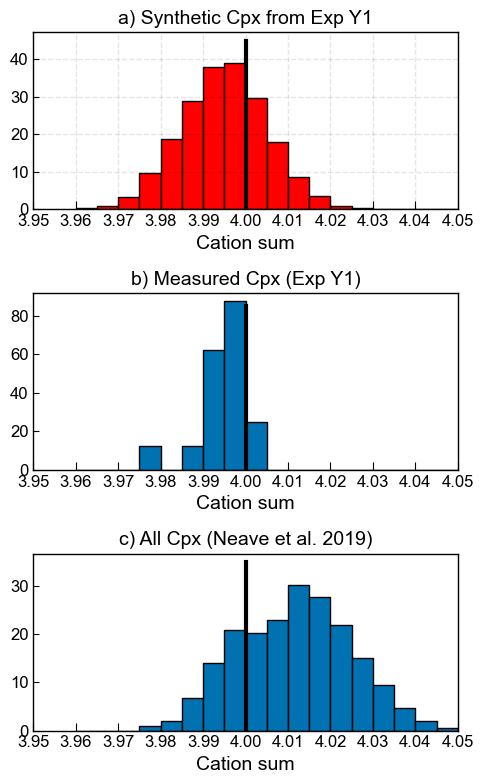

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5,8), sharex=True)
bins=[3.96, 3.965, 3.97, 3.975, 3.98, 3.985, 3.99, 3.995, 4, 4.005, 4.01,
      4.015, 4.02, 4.025,  4.03, 4.035, 4.04, 4.045, 4.05]
ax1.set_title('a) Synthetic Cpx from Exp Y1')
ax2.set_title('b) Measured Cpx (Exp Y1)')
ax3.set_title('c) All Cpx (Neave et al. 2019)')

ax1.hist(cpx_components['Cation_Sum_Cpx'], bins=bins, fc='red', ec='k', density=True);
ax3.hist(cpx_components_all_Cpx['Cation_Sum_Cpx'].loc[cpx_components_all_Cpx['Cation_Sum_Cpx'].between(3.9, 4.2)],
       fc=None, bins=bins, ec='k', density=True);
    
ax2.hist(cpx_comps_ExpY1['Cation_Sum_Cpx'].loc[cpx_components_all_Cpx['Cation_Sum_Cpx'].between(3.9, 4.2)],
       fc=None,bins=bins, ec='k', density=True);    

ax1.set_xlim([3.95, 4.05])
lw1=3
ax1.plot([4, 4], [0, 45], '-k', lw=lw1)
ax2.plot([4, 4], [0, 85], '-k', lw=lw1)
ax3.plot([4, 4], [0, 35], '-k', lw=lw1)
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.xaxis.set_tick_params(which='both', labelbottom=True)

ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)

ax1.set_xticks([3.95, 3.96, 3.97, 3.98, 3.99, 4, 4.01, 4.02, 4.03, 4.04, 4.05]);
ax1.set_xlabel('Cation sum')
ax2.set_xlabel('Cation sum')
ax3.set_xlabel('Cation sum')
fig.tight_layout()
fig.savefig('Synthetic_Cations.png', dpi=200)


### Neave Liquid calculations
- We dont have precision for Neave in the liquid - so we just make an average

In [13]:
Mean_Glass_ExpY1=Glass_ExpY1.mean(axis=0).to_frame().T

### Synthetic Calculations using mean glass

In [14]:
# 5000 synthetic Cpxs, mean glass compositions, different PT equations
Y1_Cpx_AvLiq_N17_eq33_Liq_Syn=pt.calculate_cpx_liq_press_temp_matching(
cpx_comps=ExpY1_noise1,
liq_comps=Mean_Glass_ExpY1,
H2O_Liq=0,
equationT="T_Put2008_eq33",
equationP="P_Neave2017",
return_all_pairs=True
).get('All_PTs')

Y1_Cpx_AvLiq_31_eq33_Liq_Syn=pt.calculate_cpx_liq_press_temp_matching(
cpx_comps=ExpY1_noise1,
liq_comps=Mean_Glass_ExpY1,
H2O_Liq=0,
equationT="T_Put2008_eq33",
equationP="P_Put2008_eq31",
return_all_pairs=True
).get('All_PTs')

Y1_Cpx_AvLiq_30_eq33_Liq_Syn=pt.calculate_cpx_liq_press_temp_matching(
cpx_comps=ExpY1_noise1,
liq_comps=Mean_Glass_ExpY1,
H2O_Liq=0,
equationT="T_Put2008_eq33",
equationP="P_Put2008_eq30",
return_all_pairs=True
).get('All_PTs')

Y1_Cpx_AvLiq_Pet_Liq_Syn=pt.calculate_cpx_liq_press_temp_matching(
cpx_comps=ExpY1_noise1,
liq_comps=Mean_Glass_ExpY1,
H2O_Liq=0,
equationT="T_Petrelli2020_Cpx_Liq",
equationP="P_Petrelli2020_Cpx_Liq",
return_all_pairs=True
).get('All_PTs')


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=5000 Cpx & N=1 Liqs, which is a total of N=5000 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=5000 Cpx-Liq matches using the specified filter. N=5000 Cpx out of the N=5000 Cpx that you input matched to 1 or more liquids


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=5000 Cpx & N=1 Liqs, which is a total of N=5000 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=5000 Cpx-Liq matches using the specified filter. N=5000 Cpx out of the N=5000 Cpx that you input matched to 1 or more liquids


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=5000 Cpx & N=1 Liqs, which is a total of N=5000 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=5000 Cpx-Liq matches using the specified filter. N=5000 Cpx out of the N=5000 Cpx that you input matched to 1 or more liquids


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=5000 Cpx & N=1 Liqs, which is a total of N=5000 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at you

Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at you

Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=5000 Cpx-Liq matches using the specified filter. N=5000 Cpx out of the N=5000 Cpx that you input matched to 1 or more liquids


### Calculations using measured pairs for comparison

In [15]:
## Measured pairs to overlay

Y1_Cpx_Liq_N17_eq33_Liq=pt.calculate_cpx_liq_press_temp_matching(
liq_comps=Glass_ExpY1, cpx_comps=Cpxs_ExpY1.reset_index(drop=True),
H2O_Liq=0, equationT="T_Put2008_eq33", equationP="P_Neave2017", 
return_all_pairs=True).get('All_PTs')

Y1_Cpx_Liq_30_eq33_Liq=pt.calculate_cpx_liq_press_temp_matching(
liq_comps=Glass_ExpY1, cpx_comps=Cpxs_ExpY1.reset_index(drop=True),
H2O_Liq=0, equationT="T_Put2008_eq33", equationP="P_Put2008_eq30", 
return_all_pairs=True).get('All_PTs')

Y1_Cpx_Liq_Pet_Liq=pt.calculate_cpx_liq_press_temp_matching(
liq_comps=Glass_ExpY1, cpx_comps=Cpxs_ExpY1.reset_index(drop=True),
H2O_Liq=0, equationT="T_Petrelli2020_Cpx_Liq", 
equationP="P_Petrelli2020_Cpx_Liq", return_all_pairs=True ).get('All_PTs')


Considering N=16 Cpx & N=12 Liqs, which is a total of N=192 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=192 Cpx-Liq matches using the specified filter. N=16 Cpx out of the N=16 Cpx that you input matched to 1 or more liquids
Considering N=16 Cpx & N=12 Liqs, which is a total of N=192 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=192 Cpx-Liq matches using the specified filter. N=16 Cpx out of the N=16 Cpx that you input matched to 1 or more liquids
Considering N=16 Cpx & N=12 Liqs, which is a total of N=192 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at you

Youve selected a T-independent function
Youve selected a T-independent function
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=192 Cpx-Liq matches using the specified filter. N=16 Cpx out of the N=16 Cpx that you input matched to 1 or more liquids


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [16]:
## Some other ones you can use if you want more calcs

# Uncomment if you also want eq 31 and 33
# Y1_Cpx_Liq_31_eq33_Liq=pt.calculate_cpx_liq_press_temp_matching(
# liq_comps=Glass_ExpY1, cpx_comps=Cpxs_ExpY1.reset_index(drop=True),
# H2O_Liq=0, equationT="T_Put2008_eq33", equationP="P_Put2008_eq31", 
# return_all_pairs=True).get('All_PTs')


## 6 part figure for noise paper

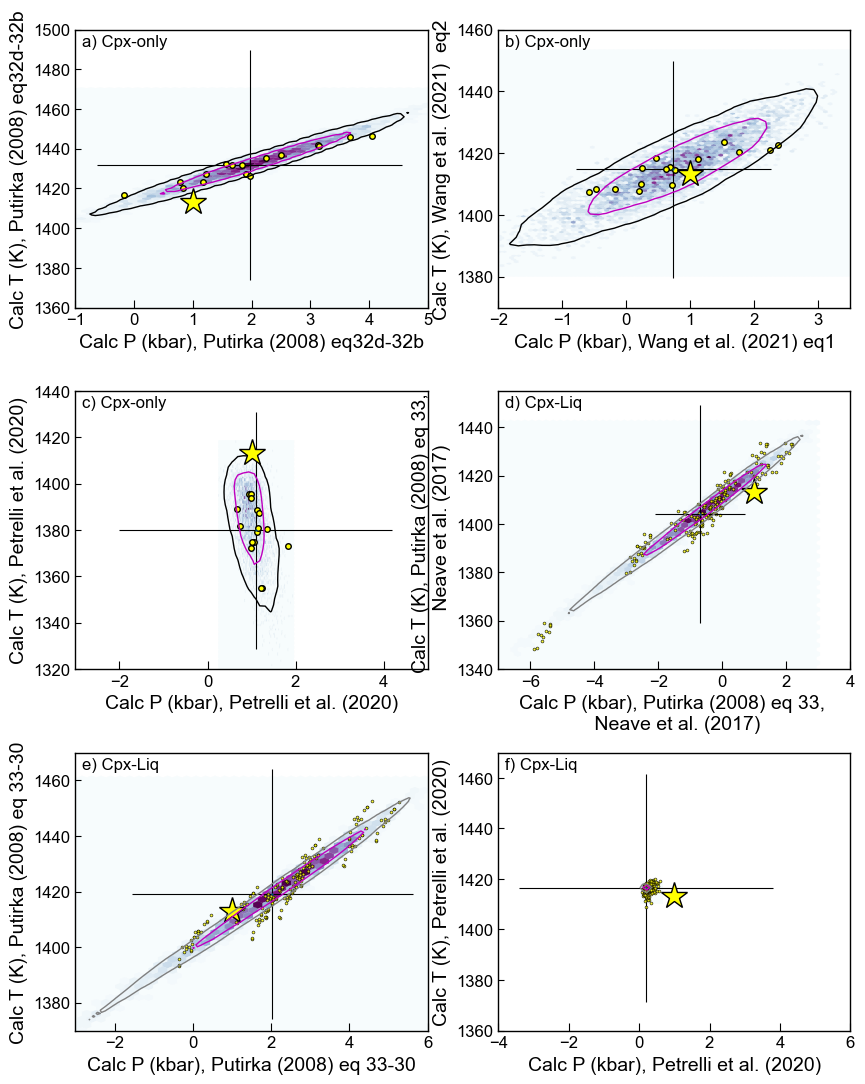

In [17]:

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))  = plt.subplots(3, 2, figsize=(10,13))
###################
extent1=(-1, 5, 1300, 1500)
Cpx_ExpY1_Syn=Cpx_ExpY1_Syn.fillna(0)
#ax1.set_title('Exp B0184-10- Neave et al. (2019)')
ax1.errorbar(np.mean(Cpx_ExpY1_Calc['P_Put_Teq32d_Peq32b']),
             np.mean(Cpx_ExpY1_Calc['T_Put_Teq32d_Peq32b']),
             xerr=2.6, yerr=58,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1, mec='k')

# h=ax1.hist2d(Cpx_ExpY1_Syn['Jd'], Cpx_ExpY1_Syn['P_Put_Teq32d_Peq32b'], bins=(50, 50), cmap=plt.cm.BuPu, 
#            label='Simulated EPMA errors', vmin=0, vmax=500)
ax1.hexbin(Cpx_ExpY1_Syn['P_Put_Teq32d_Peq32b'].loc[Cpx_ExpY1_Syn['P_Put_Teq32d_Peq32b']!=0],
           Cpx_ExpY1_Syn['T_Put_Teq32d_Peq32b'].loc[Cpx_ExpY1_Syn['P_Put_Teq32d_Peq32b']!=0]
           , cmap=plt.cm.BuPu, 
            linewidths=0.2, bins=50)
ax1.plot(Cpx_ExpY1_Calc['P_Put_Teq32d_Peq32b'],
         Cpx_ExpY1_Calc['T_Put_Teq32d_Peq32b'],
          'ok', mfc='yellow',  ms=4,label='Meas Cpx')
ax1.plot(Cpx_ExpY1_Calc['P_Put_Teq32d_Peq32b'].loc[Cpx_ExpY1_Calc['Jd_from 0=Na, 1=Al']==1],
         Cpx_ExpY1_Calc['T_Put_Teq32d_Peq32b'].loc[Cpx_ExpY1_Calc['Jd_from 0=Na, 1=Al']==1],
          'or', mfc='red',  ms=4, label='Meas Cpx')
#ax1.plot(8, 1505, '*k', ms=20,  mfc='yellow') # Note, temperature is actually 1323.15

Cpx_ExpY1_Syn.loc[Cpx_ExpY1_Syn['P_Put_Teq32d_Peq32b']!=0, 
["P_Put_Teq32d_Peq32b", "T_Put_Teq32d_Peq32b"]].pyroplot.density(ax=ax1, contours=[0.67, 0.95], colors=['m', 'k'],
                                                                                      extent=extent1,
                                                                    cmap="viridis", bins=100, label_contours=False)
ax1.set_ylim([1360, 1500])
ax1.set_xlim([-1, 5])
ax1.plot(1, 1140+273.15, '*k', mfc='yellow', ms=20)


########### ax2# ###############
extent2=(-3, 3, 1375, 1475)
ax2.errorbar(np.mean(Cpx_ExpY1_Calc['P_Wang21_eq1']),
             np.mean(Cpx_ExpY1_Calc['T_Wang21_eq2']),
             xerr=1.52, yerr=35.2,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1)
ax2.hexbin(Cpx_ExpY1_Syn['P_Wang21_eq1'].loc[Cpx_ExpY1_Syn['P_Wang21_eq1']!=0],
           Cpx_ExpY1_Syn['T_Wang21_eq2'].loc[Cpx_ExpY1_Syn['P_Wang21_eq1']!=0]
           , cmap=plt.cm.BuPu, 
            linewidths=0.2, bins=50)
ax2.plot(Cpx_ExpY1_Calc['P_Wang21_eq1'],
         Cpx_ExpY1_Calc['T_Wang21_eq2'],
         'ok', mfc='yellow',  ms=4, label='Meas Cpx')
ax2.plot(Cpx_ExpY1_Calc['P_Wang21_eq1'].loc[Cpx_ExpY1_Calc['Jd_from 0=Na, 1=Al']==1],
         Cpx_ExpY1_Calc['T_Wang21_eq2'].loc[Cpx_ExpY1_Calc['Jd_from 0=Na, 1=Al']==1],
         'or', mfc='red',  ms=4, label='Meas Cpx')
Cpx_ExpY1_Syn.loc[Cpx_ExpY1_Syn['P_Wang21_eq1']!=0, 
["P_Wang21_eq1", "T_Wang21_eq2"]].pyroplot.density(ax=ax2, contours=[0.67, 0.95], colors=['m', 'k'],
                                                                                      extent=extent2,
                                                                    cmap="viridis", bins=50, label_contours=False)
ax2.set_ylim([1370, 1460])
ax2.set_xlim([-2, 3.5])
ax2.plot(1, 1140+273.15, '*k', mfc='yellow', ms=20)

################ ax3 ##################
extent2=(-3, 3, 1330, 1460)
ax3.errorbar(np.mean(Cpx_ExpY1_Calc['P_Petrelli20']),
             np.mean(Cpx_ExpY1_Calc['T_Petrelli20']),
             xerr=3.1, yerr=51,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1)
ax3.hexbin(Cpx_ExpY1_Syn['P_Petrelli20'].loc[Cpx_ExpY1_Syn['P_Petrelli20']!=0],
           Cpx_ExpY1_Syn['T_Petrelli20'].loc[Cpx_ExpY1_Syn['P_Petrelli20']!=0]
           , cmap=plt.cm.BuPu, 
            linewidths=0.2, bins=50)
ax3.plot(Cpx_ExpY1_Calc['P_Petrelli20'],
         Cpx_ExpY1_Calc['T_Petrelli20'],
          'ok', mfc='yellow',  ms=4, label='Meas Cpx')
ax3.plot(Cpx_ExpY1_Calc['P_Petrelli20'].loc[Cpx_ExpY1_Calc['Jd_from 0=Na, 1=Al']==1],
         Cpx_ExpY1_Calc['T_Petrelli20'].loc[Cpx_ExpY1_Calc['Jd_from 0=Na, 1=Al']==1],
         'or', mfc='red',  ms=4, label='Meas Cpx')
Cpx_ExpY1_Syn.loc[Cpx_ExpY1_Syn['P_Petrelli20']!=0, 
["P_Petrelli20", "T_Petrelli20"]].pyroplot.density(ax=ax3, contours=[0.67, 0.95], colors=['m', 'k'],
                                                          extent=extent2,
                                                        cmap="viridis", bins=50, label_contours=False)
ax3.set_xlim([-3, 5])
ax3.set_ylim([1320, 1440])
ax3.plot(1, 1140+273.15, '*k', mfc='yellow', ms=20)
### ax4 ################
## Cpx=Liq
Y1_Cpx_Liq_N17_eq33_Liq_100=Y1_Cpx_Liq_N17_eq33_Liq#.sample(n=100)
extent4=(-8, 6, 1350, 1500)
ax4.plot(Y1_Cpx_Liq_N17_eq33_Liq_100['P_kbar_calc'].loc[Y1_Cpx_Liq_N17_eq33_Liq_100['Jd_from 0=Na, 1=Al']==1],
         Y1_Cpx_Liq_N17_eq33_Liq_100['T_K_calc'].loc[Y1_Cpx_Liq_N17_eq33_Liq_100['Jd_from 0=Na, 1=Al']==1],
         'or', mfc='red',  ms=2,label='Meas Cpx', alpha=0.8)
ax4.plot(Y1_Cpx_Liq_N17_eq33_Liq_100['P_kbar_calc'].loc[Y1_Cpx_Liq_N17_eq33_Liq_100['Jd_from 0=Na, 1=Al']==0],
         Y1_Cpx_Liq_N17_eq33_Liq_100['T_K_calc'].loc[Y1_Cpx_Liq_N17_eq33_Liq_100['Jd_from 0=Na, 1=Al']==0],
         'ok', mfc='yellow', ms=2, label='Meas Cpx', alpha=0.8,  mew=0.5)
ax4.hexbin(Y1_Cpx_AvLiq_N17_eq33_Liq_Syn['P_kbar_calc'],
           Y1_Cpx_AvLiq_N17_eq33_Liq_Syn['T_K_calc'],
            cmap=plt.cm.BuPu, 
            linewidths=0.2, bins=50)
ax4.errorbar(np.mean(Y1_Cpx_AvLiq_N17_eq33_Liq_Syn['P_kbar_calc']),
           np.mean(Y1_Cpx_AvLiq_N17_eq33_Liq_Syn['T_K_calc']),
             xerr=1.4, yerr=45,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1)

Y1_Cpx_AvLiq_N17_eq33_Liq_Syn.loc[:, 
["P_kbar_calc", "T_K_calc"]].pyroplot.density(ax=ax4, contours=[0.67, 0.95], colors=['m', 'grey'],
                                                          extent=extent4,
                                                        cmap="viridis", bins=100, label_contours=False, zorder=100)
ax4.set_xlim([-7, 4])
ax4.set_ylim([1340, 1455])
ax4.plot(1, 1140+273.15, '*k', mfc='yellow', ms=20)


## ax5
Y1_Cpx_Liq_30_eq33_Liq_100=Y1_Cpx_Liq_30_eq33_Liq#.sample(n=100)
extent4=(-3, 7, 1370, 1480)

ax5.errorbar(np.mean(Y1_Cpx_AvLiq_30_eq33_Liq_Syn['P_kbar_calc']),
           np.mean(Y1_Cpx_AvLiq_30_eq33_Liq_Syn['T_K_calc']),
             xerr=3.6, yerr=45,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1)

ax5.plot(Y1_Cpx_Liq_30_eq33_Liq_100['P_kbar_calc'].loc[Y1_Cpx_Liq_30_eq33_Liq_100['Jd_from 0=Na, 1=Al']==1],
         Y1_Cpx_Liq_30_eq33_Liq_100['T_K_calc'].loc[Y1_Cpx_Liq_30_eq33_Liq_100['Jd_from 0=Na, 1=Al']==1],
         'or', mfc='red',  ms=2,label='Meas Cpx', alpha=0.8,  mew=0.5)
ax5.plot(Y1_Cpx_Liq_30_eq33_Liq_100['P_kbar_calc'].loc[Y1_Cpx_Liq_30_eq33_Liq_100['Jd_from 0=Na, 1=Al']==0],
         Y1_Cpx_Liq_30_eq33_Liq_100['T_K_calc'].loc[Y1_Cpx_Liq_30_eq33_Liq_100['Jd_from 0=Na, 1=Al']==0],
         'ok', mfc='yellow', ms=2, label='Meas Cpx', alpha=0.8,   mew=0.5)
ax5.hexbin(Y1_Cpx_AvLiq_30_eq33_Liq_Syn['P_kbar_calc'],
           Y1_Cpx_AvLiq_30_eq33_Liq_Syn['T_K_calc'],
            cmap=plt.cm.BuPu, 
            linewidths=0.2, bins=50)


Y1_Cpx_AvLiq_30_eq33_Liq_Syn.loc[:, 
["P_kbar_calc", "T_K_calc"]].pyroplot.density(ax=ax5, contours=[0.67, 0.95], colors=['m', 'grey'],
                                                          extent=extent4,
                                                        cmap="viridis", bins=100, label_contours=False, zorder=100)
ax5.set_xlim([-3, 6])
ax5.set_ylim([1370, 1470])
ax5.plot(1, 1140+273.15, '*k', mfc='yellow', ms=20)

### ax6


Y1_Cpx_Liq_Pet_Liq_100=Y1_Cpx_Liq_Pet_Liq#.sample(n=100)
extent4=(-3, 7, 1370, 1480)

ax6.errorbar(np.mean(Y1_Cpx_AvLiq_Pet_Liq_Syn['P_kbar_calc']),
           np.mean(Y1_Cpx_AvLiq_Pet_Liq_Syn['T_K_calc']),
             xerr=3.6, yerr=45,
             fmt='.', ecolor='k', elinewidth=0.8, mfc='k', ms=1)

ax6.plot(Y1_Cpx_Liq_Pet_Liq_100['P_kbar_calc'].loc[Y1_Cpx_Liq_Pet_Liq_100['Jd_from 0=Na, 1=Al']==1],
         Y1_Cpx_Liq_Pet_Liq_100['T_K_calc'].loc[Y1_Cpx_Liq_Pet_Liq_100['Jd_from 0=Na, 1=Al']==1],
         'or', mfc='red',  ms=2,label='Meas Cpx', alpha=0.8,   mew=0.5)
ax6.plot(Y1_Cpx_Liq_Pet_Liq_100['P_kbar_calc'].loc[Y1_Cpx_Liq_Pet_Liq_100['Jd_from 0=Na, 1=Al']==0],
         Y1_Cpx_Liq_Pet_Liq_100['T_K_calc'].loc[Y1_Cpx_Liq_Pet_Liq_100['Jd_from 0=Na, 1=Al']==0],
         'ok', mfc='yellow', ms=2, label='Meas Cpx', alpha=0.8,   mew=0.5)
ax6.hexbin(Y1_Cpx_AvLiq_Pet_Liq_Syn['P_kbar_calc'],
           Y1_Cpx_AvLiq_Pet_Liq_Syn['T_K_calc'],
            cmap=plt.cm.BuPu, 
            linewidths=0.2, bins=50)


Y1_Cpx_AvLiq_Pet_Liq_Syn.loc[:, 
["P_kbar_calc", "T_K_calc"]].pyroplot.density(ax=ax6, contours=[0.67, 0.95], colors=['m', 'grey'],
                                                          extent=extent4,
                                                        cmap="viridis", bins=100, label_contours=False, zorder=100)
ax6.set_xlim([-4, 6])
ax6.set_ylim([1360, 1470])
ax6.plot(1, 1140+273.15, '*k', mfc='yellow', ms=20, zorder=101)

ax1.annotate("a) Cpx-only", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)
ax2.annotate("b) Cpx-only", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)
ax3.annotate("c) Cpx-only", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)
ax4.annotate("d) Cpx-Liq", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)
ax5.annotate("e) Cpx-Liq", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)
ax6.annotate("f) Cpx-Liq", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)

ax1.set_xlabel('Calc P (kbar), Putirka (2008) eq32d-32b')
ax1.set_ylabel('Calc T (K), Putirka (2008) eq32d-32b')
ax2.set_xlabel('Calc P (kbar), Wang et al. (2021) eq1')
ax2.set_ylabel('Calc T (K), Wang et al. (2021)  eq2')
ax3.set_xlabel('Calc P (kbar), Petrelli et al. (2020)')
ax3.set_ylabel('Calc T (K), Petrelli et al. (2020)')

ax4.set_xlabel('Calc P (kbar), Putirka (2008) eq 33, \n Neave et al. (2017)')
ax4.set_ylabel('Calc T (K), Putirka (2008) eq 33, \n Neave et al. (2017)')
ax5.set_xlabel('Calc P (kbar), Putirka (2008) eq 33-30')
ax5.set_ylabel('Calc T (K), Putirka (2008) eq 33-30')
ax6.set_xlabel('Calc P (kbar), Petrelli et al. (2020)')
ax6.set_ylabel('Calc T (K), Petrelli et al. (2020)')
ax3.plot(8, 1050+273.15, '*k', mfc='yellow', ms=20)
ax6.plot(8, 1050+273.15, '*k', mfc='yellow', ms=20)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
fig.savefig('Neave_Cpx_Cpx_Liq_Y272.png', dpi=300)